In [25]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
from dataCleaning import bas_filter
import scale_avg
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [26]:
bas1, key1 = bas_filter.import_and_filter('../..', 'Plt1 m', '../../Plt1 Points List.xlsx')
bas2, key2 = bas_filter.import_and_filter('../..', 'Plt2 m', '../../Plt2 Points List.xlsx')
#bas3, key3 = bas_filter.import_and_filter('../..', 'Plt3 m',  '../../Plt3 Points List.xlsx')

['../..\\Plt1 m 2016-11.csv', '../..\\Plt1 m 2016-12.csv', '../..\\Plt1 m 2017-01.csv', '../..\\Plt1 m 2017-02.csv', '../..\\Plt1 m 2017-03.csv', '../..\\Plt1 m 2017-04.csv', '../..\\Plt1 m 2017-05.csv', '../..\\Plt1 m 2017-06.csv', '../..\\Plt1 m 2017-07.csv', '../..\\Plt1 m 2017-08.csv', '../..\\Plt1 m 2017-09.csv', '../..\\Plt1 m 2017-10.csv', '../..\\Plt1 m 2017-12.csv', '../..\\Plt1 m 2018-01.csv', '../..\\Plt1 m 2018-02.csv', '../..\\Plt1 m 2018-03.csv', '../..\\Plt1 m 2018-04.csv']
CommunicationFailure_COV
Original data contains 143240 points and 414 dimensions.
Filtered data contains 136242 points and 66 dimensions.
['../..\\Plt2 m 2017-07.csv', '../..\\Plt2 m 2017-08.csv', '../..\\Plt2 m 2017-09.csv', '../..\\Plt2 m 2017-10.csv', '../..\\Plt2 m 2017-11.csv', '../..\\Plt2 m 2017-12.csv', '../..\\Plt2 m 2018-01.csv', '../..\\Plt2 m 2018-02.csv', '../..\\Plt2 m 2018-03.csv', '../..\\Plt2 m 2018-04.csv']
CHWPSPD2
Original data contains 86497 points and 412 dimensions.
Filtered dat

In [27]:
dfs = [bas1, bas2]

In [28]:
df_avg_scale = scale_avg.scale_avg(dfs)
df_avg_scale.columns

Index(['CHWST2', 'CTTR_ALARM', 'CHWRT2', 'LOOPREQ', 'CHWST', 'OptimumControl',
       'CHWDP2', 'CHWRT', 'OAWB', 'CHWFLO', 'OAT', 'CHWRT3', 'OAH', 'kW/Ton'],
      dtype='object')

In [29]:
n = len(df_avg_scale.columns)

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(df_avg_scale.values[:, 0:(n-1)], df_avg_scale.values[:,(n-1)], test_size = 0.25, random_state = 42)

In [31]:
#x2train, x2test, y2train, y2test = train_test_split(bas2.values[:, 0:(m-2)], bas2.values[:,(m-1)], test_size = 0.25, random_state = 42)

#### LASSO

In [32]:
reg_lasso = linear_model.Lasso()
reg_lasso.fit(xtrain, ytrain)
coef = reg_lasso.coef_
lasso_coef = pd.DataFrame(coef, df_avg_scale.columns[:-1])
#lasso_coef = lasso_coef[coef!=0]
lasso_coef.columns = ['lasso_coef']
print (lasso_coef)
lc = lasso_coef.values.tolist()

                lasso_coef
CHWST2                -0.0
CTTR_ALARM             0.0
CHWRT2                -0.0
LOOPREQ                0.0
CHWST                 -0.0
OptimumControl         0.0
CHWDP2                -0.0
CHWRT                 -0.0
OAWB                   0.0
CHWFLO                 0.0
OAT                    0.0
CHWRT3                -0.0
OAH                    0.0


In [33]:
#reg_lasso = linear_model.Lasso()
#reg_lasso.fit(x2train, y2train)
#coef = reg_lasso.coef_
#lasso_coef = pd.DataFrame(coef, bas2.columns[:-2])
#lasso_coef = lasso_coef[coef!=0]
#lasso_coef.columns = ['lasso_coef']
#print (lasso_coef)
#lc = lasso_coef.values.tolist()

-9.049967279994853e-05
0.00045707592115280706


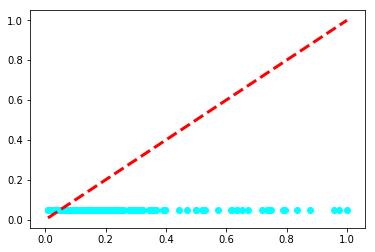

In [34]:
y1las = cross_val_predict(reg_lasso, xtest, ytest)
plt.scatter(ytest, y1las, color = 'cyan')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=3, color = 'red')
print (metrics.r2_score(ytest, y1las))
print (metrics.mean_squared_error(ytest, y1las))

In [35]:
#y2las = cross_val_predict(reg_lasso, x2test, y2test)
#plt.scatter(y2test, y2las, color = 'cyan')
#plt.plot([y2test.min(), y2test.max()], [y2test.min(), y2test.max()], 'k--', lw=3, color = 'red')
#print (metrics.r2_score(y2test, y2las))
#print (metrics.mean_squared_error(y2test, y2las))

#### LINEAR REGRESSION

In [36]:
reg1_linear = linear_model.LinearRegression()
reg1_linear.fit(xtrain, ytrain)
coef = reg1_linear.coef_
linear_coef1 = pd.DataFrame(coef, df_avg_scale.columns[:-1])
#linear_coef1 = linear_coef1[abs(coef) > 1e-02]
linear_coef1.columns = ['linear_coef']
linear_coef1

,linear_coef
CHWST2,5.073634e-02
CTTR_ALARM,3.469447e-17
CHWRT2,4.466197e-02
LOOPREQ,-1.734723e-18
CHWST,-5.759470e-02
OptimumControl,1.387779e-17
CHWDP2,-1.036617e-02
CHWRT,4.665684e-02
OAWB,3.242858e-02
CHWFLO,-3.058946e-02


In [37]:
#reg2_linear = linear_model.LinearRegression()
#reg2_linear.fit(x2train, y2train)
#coef = reg2_linear.coef_
#linear_coef2 = pd.DataFrame(coef, bas2.columns[:-2])
#linear_coef2 = linear_coef2[abs(coef) > 1e-02]
#linear_coef2.columns = ['linear_coef']
#linear_coef2

In [38]:
linear_coef1.describe()

,linear_coef
count,1.300000e+01
mean,-1.786077e-03
std,5.343555e-02
min,-1.427872e-01
25%,-1.036617e-02
50%,3.469447e-17
75%,4.191624e-02
max,5.073634e-02


In [39]:
#linear_coef2.describe()

0.32352969736067183
0.0003091703068997752


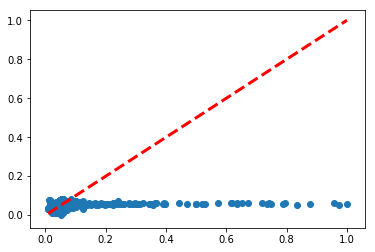

In [40]:
ylin1 = cross_val_predict(reg1_linear, xtest, ytest, cv = 10)
plt.scatter(ytest, ylin1)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=3, color = 'red')
print (metrics.r2_score(ytest, ylin1))
print (metrics.mean_squared_error(ytest, ylin1))

In [41]:
#ylin2 = cross_val_predict(reg2_linear, x2test, y2test, cv = 10)
#plt.scatter(y1test, ylin1)
#plt.plot([y2test.min(), y2test.max()], [y2test.min(), y2test.max()], 'k--', lw=3, color = 'red')
#print (metrics.r2_score(y2test, ylin2))
#print (metrics.mean_squared_error(y2test, ylin2))